In [14]:
import pandas as pd

df = pd.read_csv('SMSSpamCollection.txt',
                 delimiter='\t',
                 header=None)

print(df.head())

print('Number of spam messages: %s' % df[df[0] == 'spam'][0].count())
print('Number of ham messages: %s' % df[df[0] == 'ham'][0].count())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Number of spam messages: 747
Number of ham messages: 4825


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

X = df[1].values
y = df[0].values

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

for i, prediction in enumerate(predictions[:5]):
    print('Predicted: %s, message: %s' % (prediction, X_test_raw[i]))

Predicted: ham, message: hi my darlin im on my way to London and we have just been smashed into by another driver! and have a big dent! im really missing u what have u been up to? xxx
Predicted: ham, message: How much did ur hdd casing cost.
Predicted: ham, message: Where r e meeting tmr?
Predicted: ham, message: So the sun is anti sleep medicine.
Predicted: ham, message: I have many dependents


## 二元分类性能指标

[[4 1]
 [2 3]]


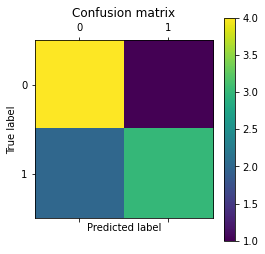

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 准确率

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
df = pd.read_csv('sms.csv')

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'], random_state=11)

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()

classifier.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print('Accuracies: %s' % scores)
print('Mean accuracy: %s' % np.mean(scores))

Accuracies: [0.95215311 0.95454545 0.96291866 0.96052632 0.94856459]
Mean accuracy: 0.9557416267942583


## 精确率和召回率
**单独来看，精准率和召回率并没有意义，它们都是关于分类器性能的不完整视角。精准率和召回率都无法区分性能良好的分类器和性能很差的特定种类的分类器。**一个普通的分类器可以通过把每一个实例都预测为阳性来达到完美的召回率。

In [5]:
precisions = cross_val_score(classifier, X_train, y_train,
                             cv=5,
                             scoring='precision')
print('Precision: %s' % np.mean(precisions))

recalls = cross_val_score(classifier, X_train, y_train,
                          cv=5,
                          scoring='recall')
print('Recall: %s' % np.mean(recalls))

Precision: 0.9924976942419154
Recall: 0.6800807328054649


## 计算$F1$值